In [2]:
cd ../..

/Users/ericpei/Documents/GalvClas/fantasy-score-predictor


In [3]:
from scripts import make_df

In [4]:
from scripts import random_forest

/Users/ericpei/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [ ]:
#make_df.create_csvs('alldata')

In [5]:
df = make_df.create_df()

In [6]:
df = make_df.clean_df(df)

scripts/make_df.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['MP'] = df['MP'].map(lambda x: '0:00' if ":" not in str(x) else str(x))


In [7]:
df = make_df.drop_zerominutes(df)

In [8]:
df = make_df.add_features(df)

In [9]:
#look at this later
Player_Averages = make_df.make_averages(df)

In [10]:
date_matrix = make_df.get_date_matrix(df)

In [11]:
make_df.addcolumns(make_df.make_lists(date_matrix), df)

In [12]:
tp_matrix = df[['Player Name', '3P']].values
fg_matrix = df[['Player Name', 'FG']].values
ft_matrix = df[['Player Name', 'FT']].values
reb_matrix = df[['Player Name', 'TRB']].values
ast_matrix = df[['Player Name', 'AST']].values
blk_matrix = df[['Player Name', 'BLK']].values
stl_matrix = df[['Player Name', 'STL']].values
tov_matrix = df[['Player Name', 'TOV']].values
usg_matrix = df[['Player Name', 'USG%']].values
ftr_matrix = df[['Player Name', 'FTr']].values
pm_matrix = df[['Player Name', '+/-']].values
ts_matrix = df[['Player Name', 'TS%']].values
pf_matrix = df[['Player Name', 'PF']].values
ortg_matrix = df[['Player Name', 'ORtg']].values
drtg_matrix = df[['Player Name', 'DRtg']].values

In [13]:
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=tp_matrix, column='3P'), df, name='TP')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=fg_matrix, column='FG'), df, name='FG')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=ft_matrix, column='FT'), df, name='FT')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=reb_matrix, column='TRB'), df, name='TRB')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=ast_matrix, column='AST'), df, name='AST')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=blk_matrix, column='BLK'), df, name='BLK')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=stl_matrix, column='STL'), df, name='STL')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=tov_matrix, column='TOV'), df, name='TOV')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=usg_matrix, column='USG%'), df, name ='USGP')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=ftr_matrix, column='FTr'), df, name ='FTr')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=pm_matrix, column='+/-'), df, name ='PM')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=ts_matrix, column='TS%'), df, name ='TSP')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=pf_matrix, column='PF'), df, name ='PF')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=ortg_matrix, column='ORtg'), df, name ='ORtg')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=drtg_matrix, column='DRtg'), df, name ='DRtg')

In [14]:
from scripts import elevation_flight

In [15]:
Elevation_Lookup = elevation_flight.read_to_dict()

In [16]:
elevation_flight.lookup_and_add(Elevation_Lookup, df)

# Exploration

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
from sklearn.ensemble import RandomForestRegressor

### Make a testing Set

In [19]:
forest_df, y_df = random_forest.date_with_forest(df, remove_date=True)

In [20]:
test_df, testy_df = random_forest.date_with_forest(df, remove_date=False)

In [21]:
import datetime

In [22]:
today = datetime.date.today()
stop_average_date = today - datetime.timedelta(0)

In [23]:
test_df = test_df[test_df['Date'] > stop_average_date]
testy_df = testy_df[testy_df['Date'] > stop_average_date]

In [24]:
test_df = test_df.ix[:,test_df.columns != 'Date']
testy_df = testy_df.ix[:, testy_df.columns != 'Date']

In [25]:
#forest_df, y_df = random_forest.prepare_for_forest(df)

In [26]:
TestSubject = 'Stephen Curry'

In [27]:
Stephcurry, Stephcurryafter_X, Stephcurryafter_y = random_forest.individual_forest_df(test_df, testy_df, TestSubject)

In [28]:
Stephcurry, Stephcurry_X, Stephcurry_y = random_forest.individual_forest_df(forest_df, y_df, TestSubject)

In [29]:
X_train, X_test, y_train, y_test = random_forest.crossval_player(Stephcurry, forest_df[forest_df["Player Name"] != TestSubject], y_df[y_df['Player Name'] != TestSubject], cat=2)
X_trainA, X_testA, y_trainA, y_testA = random_forest.crossval_player(Stephcurry, test_df, testy_df, cat=2)
X_trainS, X_testS, y_trainS, y_testS = random_forest.crossval_player(Stephcurry, Stephcurry_X, Stephcurry_y, cat=2)
X_trainSA, X_testSA, y_trainSA, y_testSA = random_forest.crossval_player(Stephcurry, Stephcurryafter_X, Stephcurryafter_y, cat = 2)

scripts/random_forest.py:72: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  X_train, X_test, y_train, y_test = train_test_split(player_x[list(player_x.columns-['Player Name'])], player_y.iloc[:,cat], test_size = 0.25, random_state = 30)


###### X Train is the df without Curry
###### X Train2 is the df with just Curry
###### S = Curry A is after cutoff

In [30]:
X_trainfull = pd.concat([X_train, X_trainS, X_trainS, X_trainSA])
y_trainfull = pd.concat([y_train, y_trainS, y_trainS, y_trainSA])

Now X Train2 is just Curry, while X Train is everyone including Curry

In [31]:
everyFGmean = pd.concat([y_train, y_trainS]).mean()
stephFGmean = y_trainS.mean()

In [32]:
len(X_test), len(X_testSA)

(68332, 0)

In [33]:
benchmark = np.full(len(X_testA)+len(X_testSA), everyFGmean)
s_benchmark = np.full(len(X_testSA), stephFGmean)

In [34]:
rf = RandomForestRegressor()
rf2 = RandomForestRegressor()

In [35]:
rf.fit(X_trainfull, y_trainfull)
rf2.fit(X_trainS, y_trainS)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [36]:
y_predict = rf.predict(X_testA)
y_predict = np.append(y_predict, rf.predict(X_testSA))# + rf.predict(X_test2)
y_predictS = rf2.predict(X_testSA)

ValueError: Found array with 0 sample(s) (shape=(0, 66)) while a minimum of 1 is required.

### MSE of Everyone model on everyone. MSE of my StephCurry Model on himself

In [37]:
mean_squared_error(np.append(y_testA,y_testSA), y_predict), mean_squared_error(y_testSA, y_predictS)

NameError: name 'y_predict' is not defined

## How do we do against the benchmark?

In [38]:
mean_squared_error(np.append(y_testA,y_testSA), benchmark), mean_squared_error(y_testSA, s_benchmark)

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

#### We have a lower MSE than average on all players
#### Lower MSE on Curry compared to his own average

In [39]:
y_predict3 = rf.predict(X_testSA)
mean_squared_error(y_testSA, y_predict3)

ValueError: Found array with 0 sample(s) (shape=(0, 66)) while a minimum of 1 is required.

# Averages Per Min

In [40]:
from scripts import pca_ready

In [41]:
PA = make_df.make_averages(df)

In [42]:
PA48 = make_df.make_averages_per48(PA)

In [43]:
mat, comp = pca_ready.run_pca(PA48.iloc[:,:8])

In [44]:
from sklearn.cluster import KMeans

In [45]:
km = KMeans(n_clusters=5, random_state = 30)
#km = KMeans(n_clusters=10, random_state = 30)


In [46]:
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline

([array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,   21.,  247.,  314.,  233.,  218.,  127.,   26.,    3.,
            1.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            1.,    0.,    1.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    8.,    3.,
            7.,   35.,  148.,  340.,  319.,  203.,   74.,   34.,   15.,
            4.,    1.,    0.,    1.,    0.,    1.,    0.,    0.,    0.,
            0.,    0.,    0.]),
  array([   1.,    0.,    1.,    0.,    0.,    0.,    0.,    2.,    9.,
           16.,   52.,  114.,  251.,  374.,  273.,   79.,   15.,    2.,
            0.,    1.,    1.,    1.,    1.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.])],
 array([ -8.57121843,  -7.92549346,  -7.27976849,  -6.63404351,
         -5.98831854,  -5.34259357,  -4.6968686 ,  -4.05114362,
         -3.40541865,  -2.75969368,  -2.11396871,  -1.46824373,
         -0.82251876,  -0.17679379,   0.46893119,   1.11465616,

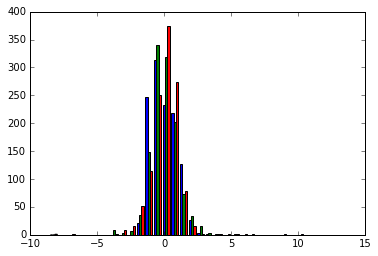

In [48]:
plt.hist(mat, bins=30)

In [49]:
km.fit(mat)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [50]:
dict_pca2 = pca_ready.make_cluster_dictionary2(km, PA48)

In [51]:
dict_pca2

defaultdict(list,
            {0: ['Aaron Harrison',
              'Aaron McKie',
              'Adrian Griffin',
              'Alex Kirk',
              'Alex Scales',
              'Alonzo Gee',
              'Andre Dawkins',
              'Andre Emmett',
              'Andre Roberson',
              'Andreas Glyniadakis',
              'Anfernee Hardaway',
              'Anthony Brown',
              'Anthony Goldwire',
              'Anthony Tolliver',
              'Antoine Wright',
              'Antonio Anderson',
              'Axel Toupane',
              'Ben Hansbrough',
              'Bernard Robinson',
              'Billy Thomas',
              'Branden Dawson',
              'Brandon Rush',
              'Brian Cardinal',
              'Brian Scalabrine',
              'Bruce Bowen',
              'Bruno Caboclo',
              'Bryce Dejean-Jones',
              'Calbert Cheaney',
              'Calvin Booth',
              'Casey Jacobsen',
              'Cedric Bozem

# Try with original 8

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
standard_scaler = StandardScaler()

In [54]:
scaled = standard_scaler.fit_transform(PA48.iloc[:,:8])

In [55]:
km.fit(scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [56]:
dict_nonpca = pca_ready.make_cluster_dictionary2(km, PA48.iloc[:,:8])

In [57]:
dict_nonpca[0][:10]

['A.J. Price',
 'Aaron Brooks',
 'Adam Morrison',
 'Adonis Thomas',
 'Al Harrington',
 'Alan Anderson',
 'Alando Tucker',
 'Alex Acker',
 'Allan Ray',
 'Allen Crabbe']

# 3D Plot on PCA

In [58]:
from mpl_toolkits.mplot3d import Axes3D

In [59]:
from scripts import makeplot

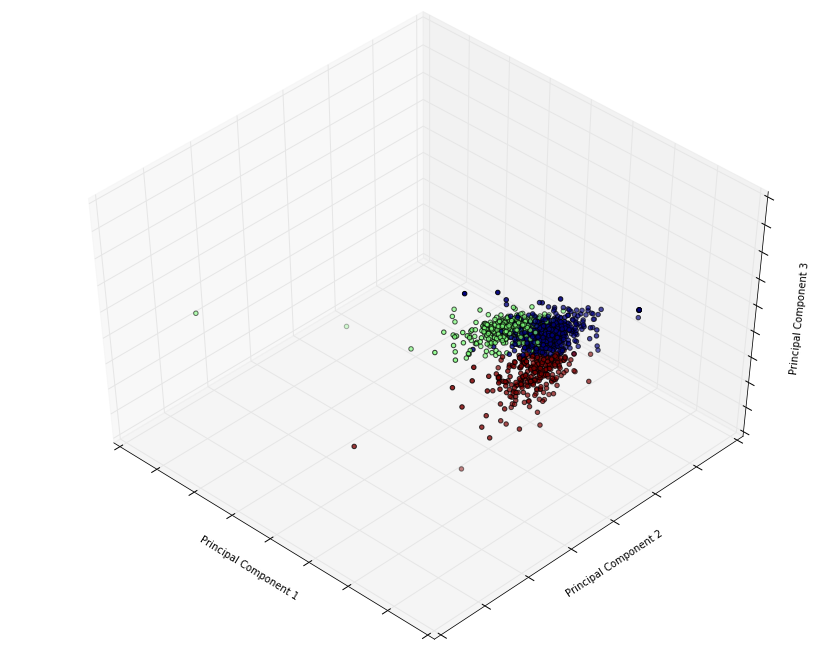

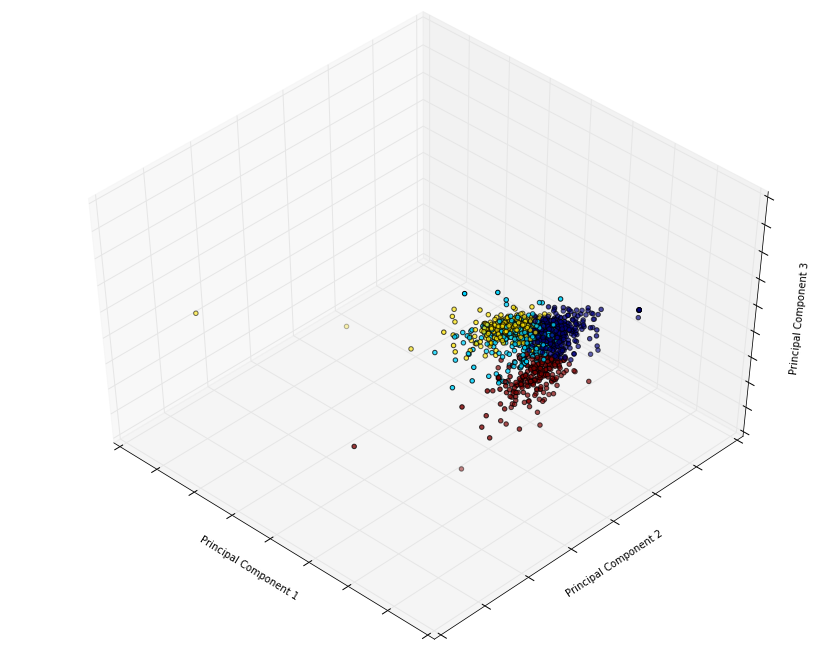

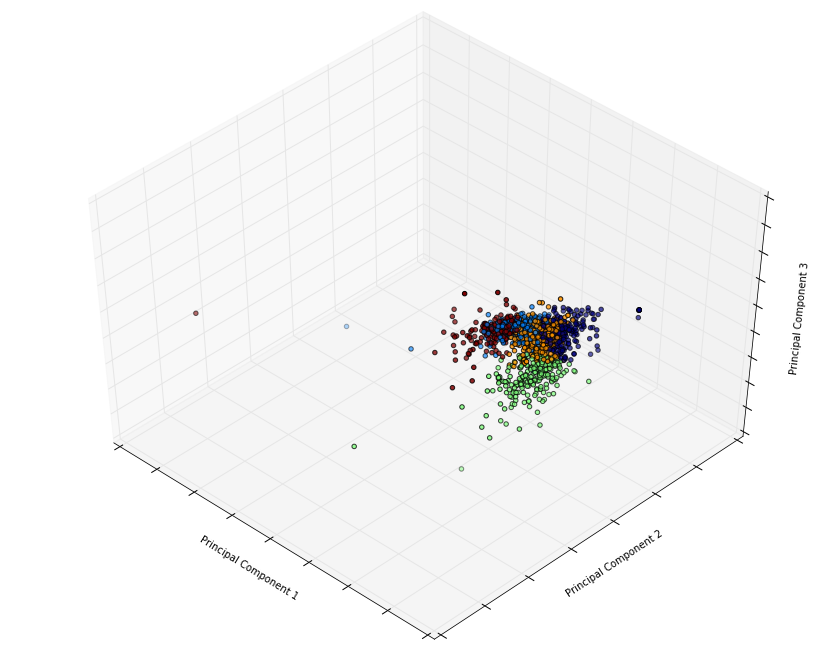

In [60]:
makeplot.make_plots(mat, filename='pickle')

In [66]:
mat.sort_values(by=0, ascending=True).head()

,0,1,2
235,-2.098383,1.210921,1.032102
1009,-2.056424,-0.732874,-2.048537
1007,-1.962149,2.345746,-2.531527
275,-1.873621,1.307856,-3.433516
1067,-1.667683,-1.378243,0.427694


In [ ]:
1086, 147, 551, 1041, 1063, 21, 671

In [67]:
PA48.index[[1086, 147, 551, 1041, 1063, 21, 671]]

Index([u'Thanasis Antetokounmpo', u'Bryon Russell', u'Jerrelle Benimon',
       u'Sim Bhullar', u'Steven Hill', u'Alan Williams', u'Kevon Looney'],
      dtype='object', name=u'Player Name')

#### Points 1061, 147, 550, 1039, 1084 are problematic

# Find outliers that are messing up PCA

### Drop them from PCA

In [68]:
PA48_nout = PA48.drop(PA48.index[[1086, 147, 551, 1041, 1063, 21, 671]])

In [69]:
mat_nout, comp_nout = pca_ready.run_pca(PA48_nout.iloc[:,:8])

In [70]:
km = KMeans(n_clusters=3, random_state = 30)

In [71]:
km.fit(mat_nout)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [72]:
dict_pca2_nout = pca_ready.make_cluster_dictionary2(km, PA48_nout.iloc[:,:8])

In [73]:
dict_pca2_nout

defaultdict(list,
            {0: ['A.J. Price',
              'Aaron Brooks',
              'Aaron McKie',
              'Aaron Miles',
              'Acie Law',
              'Alexey Shved',
              'Allen Iverson',
              'Alvin Williams',
              'Andre Barrett',
              'Andre Iguodala',
              'Andre Miller',
              'Andrei Kirilenko',
              'Anfernee Hardaway',
              'Anthony Carter',
              'Anthony Johnson',
              'Antonio Burks',
              'Antonio Daniels',
              'Armon Johnson',
              'Baron Davis',
              'Ben Hansbrough',
              'Ben Uzoh',
              'Beno Udrih',
              'Bobby Brown',
              'Boris Diaw',
              'Brandon Jennings',
              'Brandon Knight',
              'Brandon Roy',
              'Brevin Knight',
              'Brian Roberts',
              'Briante Weber',
              'C.J. Watson',
              'Cameron Payne',
  

# Regraph

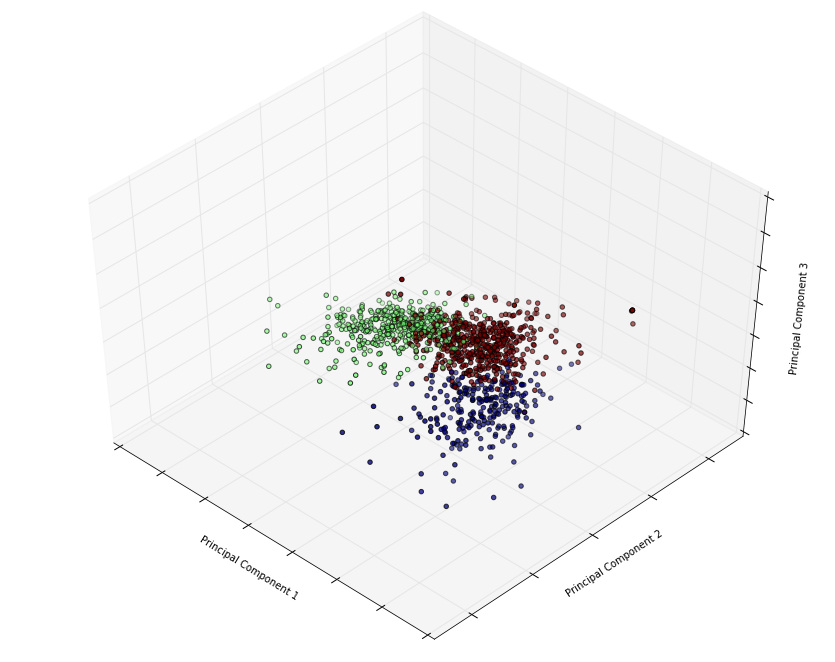

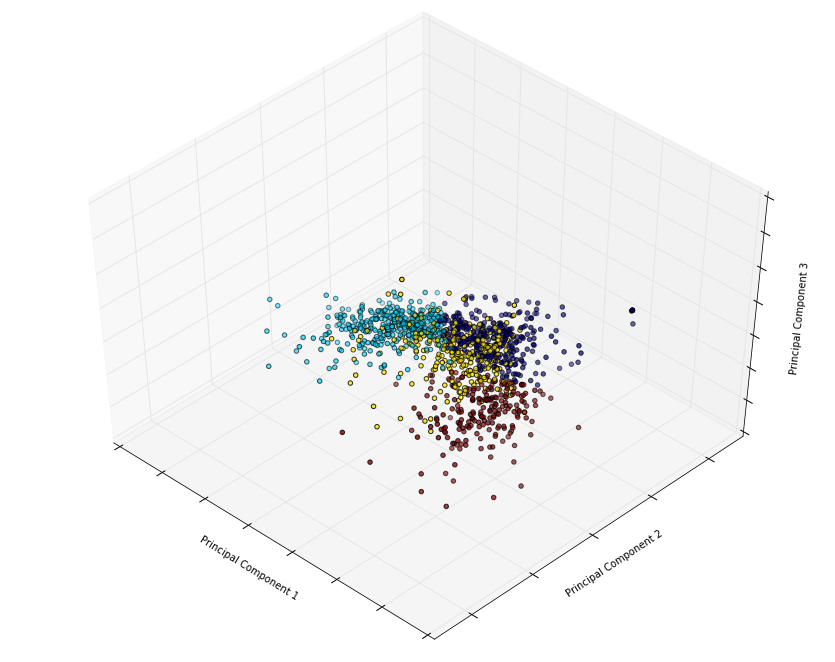

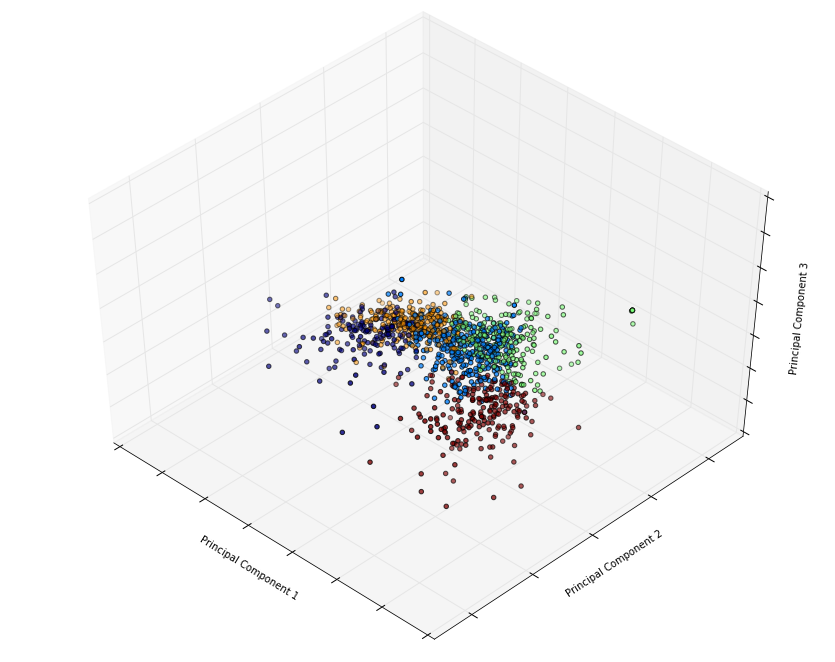

In [74]:
makeplot.make_plots(mat_nout, filename='picklermoutlier')

# Silhouette Score Benchmark

In [75]:
from scripts import makesilplot

In [ ]:
makesilplot.plot_silhouette(mat_nout, 15)

In [ ]:
makesilplot.cluster_plot(mat_nout, 3)

In [ ]:
makesilplot.cluster_plot(mat_nout, 4)

##### data suggest not really clusterable

In [ ]:
km = KMeans(n_clusters=3, random_state = 30)

In [ ]:
km.fit(mat_nout)

##### lets look at the actual clusters

In [77]:
dict_pca4_nout = pca_ready.make_cluster_dictionary2(km, PA48_nout)
dict_pca4_nout[2][:10]

['Aaron Harrison',
 'Adam Morrison',
 'Adonis Thomas',
 'Al Harrington',
 'Al Thornton',
 'Alan Anderson',
 'Alando Tucker',
 'Alec Burks',
 'Alex Acker',
 'Alex Kirk']

#### despite silhouette scores indicating clusters not optimal, clusters seem to make sense. This cluster has a very high density of guards. Steph Curry, Chris Paul, Steve Nash, Russell Westbrook, Tony Parker, Jeremy Lin.

# Cluster Sense

### Let us evaluate these clusters by looking at the 10 highest expected scores per cluster

In [78]:
player_score_list1 = []
for player in dict_pca4_nout[0]:
    player_score_list1.append((player, PA.ix[player, 'Score']))
sorted(player_score_list1, key=lambda x: x[1], reverse=True)[:10]

[('LeBron James', 48.513389626055492),
 ('Kobe Bryant', 41.45146036161335),
 ('Chris Paul', 41.370413436692509),
 ('Dwyane Wade', 40.589415041782729),
 ('Russell Westbrook', 39.889455782312922),
 ('Allen Iverson', 39.085526315789465),
 ('Stephen Curry', 38.701008064516131),
 ('John Wall', 37.757582938388616),
 ('Damian Lillard', 34.937577639751559),
 ('James Harden', 34.71102803738318)]

In [79]:
player_score_list2 = []
for player in dict_pca4_nout[1]:
    player_score_list2.append((player, PA.ix[player, 'Score']))
sorted(player_score_list2, key=lambda x: x[1], reverse=True)[:10]

[('Kevin Durant', 42.536760124610595),
 ('Anthony Davis', 40.734999999999999),
 ('Blake Griffin', 39.678345498783457),
 ('Dwight Howard', 39.317146433041302),
 ('Carmelo Anthony', 39.157449664429542),
 ('DeMarcus Cousins', 38.941204819277111),
 ('Yao Ming', 38.010330578512395),
 ('Pau Gasol', 37.757727873183619),
 ('Dirk Nowitzki', 36.487301587301587),
 ('Karl-Anthony Towns', 36.335365853658537)]

In [80]:
player_score_list3 = []
for player in dict_pca4_nout[2]:
    player_score_list3.append((player, PA.ix[player, 'Score']))
sorted(player_score_list3, key=lambda x: x[1], reverse=True)[:10]

[('Rudy Gay', 30.728769017980639),
 ('Joe Johnson', 30.083922046285014),
 ('Michael Redd', 28.352050473186114),
 ('Luol Deng', 28.300786369593705),
 ('Andrew Wiggins', 27.757055214723927),
 ('Jason Richardson', 27.75009174311927),
 ('DeMar DeRozan', 27.351532567049812),
 ('Danny Granger', 27.222013651877131),
 ('Stephen Jackson', 27.045886654478981),
 ('Klay Thompson', 26.98268733850129)]

# Start aggregating players

In [ ]:
clusteroneX, clusteroney = random_forest.date_with_forest(df, remove_date=False)

In [ ]:
dict_pca4_nout

In [ ]:
one_x = clusteroneX[clusteroneX['Player Name'].isin(dict_pca4_nout[2])]
one_y = clusteroney[clusteroney['Player Name'].isin(dict_pca4_nout[2])]

In [ ]:
curryleftx = one_x[one_x['Player Name'] != 'Stephen Curry']
currylefty = one_y[one_y['Player Name'] != 'Stephen Curry']

In [ ]:
onlycurryx = one_x[one_x['Player Name'] == 'Stephen Curry']
onlycurryy = one_y[one_y['Player Name'] == 'Stephen Curry']

In [ ]:
today = datetime.date.today()
stop_average_date = today - datetime.timedelta(140)

In [ ]:
aftercurryx = onlycurryx[onlycurryx['Date'] > stop_average_date]
aftercurryy = onlycurryy[onlycurryy['Date'] > stop_average_date]

In [ ]:
beforecurryx = onlycurryx[onlycurryx['Date'] <= stop_average_date]
beforecurryy = onlycurryy[onlycurryy['Date'] <= stop_average_date]

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
aftercurryx_train, aftercurryx_test, aftercurryy_train, aftercurryy_test = train_test_split(aftercurryx[list(aftercurryx.columns-['Player Name','Date'])], aftercurryy.iloc[:,3], test_size = 0.25, random_state = 30)

In [ ]:
ClusterOne_xtrain = pd.concat([curryleftx, beforecurryx])
ClusterOne_ytrain = pd.concat([currylefty['FG'], beforecurryy['FG']])
ClusterOne_StephAvg = pd.concat([beforecurryy['FG'], aftercurryy_train]).mean()
#ClusterOne_ytrain = ClusterOne_ytrain.append(aftercurryy_train)

In [ ]:
ClusterOne_xtrain = ClusterOne_xtrain.drop('Date', axis=1)

In [ ]:
ClusterOne_rf = RandomForestRegressor()

In [ ]:
ClusterOne_rf.fit(ClusterOne_xtrain.ix[:, ClusterOne_xtrain.columns != 'Player Name'], ClusterOne_ytrain)

In [ ]:
clustcurrypredictions = ClusterOne_rf.predict(aftercurryx_test)

In [ ]:
mean_squared_error(clustcurrypredictions, aftercurryy_test)

In [ ]:
#PA.loc['Stephen Curry', 'FG']

In [ ]:
stephavg = np.empty(len(clustcurrypredictions))

In [ ]:
ClusterOne_StephAvg

In [ ]:
stephavg.fill(ClusterOne_StephAvg)

In [ ]:
mean_squared_error(stephavg, aftercurryy_test)

In [ ]:
clustcurrypredictions

In [ ]:
aftercurryy_test

# Cluster Two

In [83]:
from scripts import random_forest

In [85]:
from scripts import clusters

In [86]:
PA140 = make_df.make_averages(df)

In [93]:
model_dict2 = clusters.get_model_dict(df, cluster_dict=dict_pca4_nout, cluster_num=2)

# Cluster One

In [ ]:
from scripts import clusters

In [94]:
model_dict1 = clusters.get_model_dict(df, cluster_dict=dict_pca4_nout, cluster_num=1)

# Cluster Zero

In [95]:
model_dict0 = clusters.get_model_dict(df, cluster_dict=dict_pca4_nout, cluster_num=0)

In [96]:
import cPickle as pickle

In [97]:
pickle.dump(model_dict0, open( "score-predictor/pickles/Cluster0model.p", "wb" ) )

In [98]:
pickle.dump(model_dict1, open( "score-predictor/pickles/Cluster1model.p", "wb" ) )

In [99]:
pickle.dump(model_dict2, open( "score-predictor/pickles/Cluster2model.p", "wb" ) )

In [100]:
pickle.dump(dict_pca4_nout, open( "score-predictor/pickles/cluster_dictionary.p", "wb" ) )

In [ ]:
cluster_dictionary = pickle.load()

In [105]:
filename = 'score-predictor/pickles/cluster_pickles_with_dictionary.r'

In [106]:
with open(filename,'wb') as fp:
    pickle.dump(dict_pca4_nout,fp)
    pickle.dump(model_dict0,fp)
    pickle.dump(model_dict1,fp)
    pickle.dump(model_dict2,fp)

In [107]:
with open(filename,'rb') as fp:
    cl_di=pickle.load(fp)
    model0_d=pickle.load(fp)
    model1_d=pickle.load(fp)
    model2_d=pickle.load(fp)

In [137]:
cl_di

defaultdict(list,
            {0: ['A.J. Price',
              'Aaron Brooks',
              'Aaron McKie',
              'Aaron Miles',
              'Acie Law',
              'Alexey Shved',
              'Allen Iverson',
              'Alvin Williams',
              'Andre Barrett',
              'Andre Iguodala',
              'Andre Miller',
              'Andrei Kirilenko',
              'Anfernee Hardaway',
              'Anthony Carter',
              'Anthony Johnson',
              'Antonio Burks',
              'Antonio Daniels',
              'Armon Johnson',
              'Baron Davis',
              'Ben Hansbrough',
              'Ben Uzoh',
              'Beno Udrih',
              'Bobby Brown',
              'Boris Diaw',
              'Brandon Jennings',
              'Brandon Knight',
              'Brandon Roy',
              'Brevin Knight',
              'Brian Roberts',
              'Briante Weber',
              'C.J. Watson',
              'Cameron Payne',
  

In [133]:
fd = forest_df[forest_df.columns - ['Player Name']]

/Users/ericpei/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [143]:
clusters.get_predictions(df.iloc[50,:], cl_di, cluster_num=0)

TypeError: Cannot compare type 'Timestamp' with type 'date'

In [140]:
y_df.iloc[50,:]

Player Name    A.J. Price
3P                      5
FG                      6
FT                      0
TRB                     1
AST                     2
BLK                     0
STL                     1
TOV                     2
Name: 50, dtype: object

In [146]:
forest_df.columns

Index([u'SP_1dayago', u'SP_2dayago', u'SP_3dayago', u'SP_4dayago',
       u'TP1dayago', u'TP2dayago', u'TP3dayago', u'TP4dayago', u'FG1dayago',
       u'FG2dayago', u'FG3dayago', u'FG4dayago', u'FT1dayago', u'FT2dayago',
       u'FT3dayago', u'FT4dayago', u'TRB1dayago', u'TRB2dayago', u'TRB3dayago',
       u'TRB4dayago', u'AST1dayago', u'AST2dayago', u'AST3dayago',
       u'AST4dayago', u'BLK1dayago', u'BLK2dayago', u'BLK3dayago',
       u'BLK4dayago', u'STL1dayago', u'STL2dayago', u'STL3dayago',
       u'STL4dayago', u'TOV1dayago', u'TOV2dayago', u'TOV3dayago',
       u'TOV4dayago', u'USGP1dayago', u'USGP2dayago', u'USGP3dayago',
       u'USGP4dayago', u'FTr1dayago', u'FTr2dayago', u'FTr3dayago',
       u'FTr4dayago', u'PM1dayago', u'PM2dayago', u'PM3dayago', u'PM4dayago',
       u'TSP1dayago', u'TSP2dayago', u'TSP3dayago', u'TSP4dayago',
       u'PF1dayago', u'PF2dayago', u'PF3dayago', u'PF4dayago', u'ORtg1dayago',
       u'ORtg2dayago', u'ORtg3dayago', u'ORtg4dayago', u'DRtg1dayago'

In [144]:
fd.iloc[50,:]

AST1dayago        1.000
AST2dayago        3.000
AST3dayago        0.000
AST4dayago        1.000
BLK1dayago        0.000
BLK2dayago        0.000
BLK3dayago        0.000
BLK4dayago        0.000
DRtg1dayago     113.000
DRtg2dayago     106.000
DRtg3dayago      97.000
DRtg4dayago     105.000
Elevation       715.000
FG1dayago         4.000
FG2dayago         2.000
FG3dayago         3.000
FG4dayago         4.000
FT1dayago         4.000
FT2dayago         0.000
FT3dayago         0.000
FT4dayago         2.000
FTr1dayago        0.400
FTr2dayago        0.000
FTr3dayago        0.000
FTr4dayago        0.300
ORtg1dayago     106.000
ORtg2dayago     176.000
ORtg3dayago      74.000
ORtg4dayago     108.000
OneisHome         1.000
                 ...   
PM3dayago        -4.000
PM4dayago        -1.000
SP_1dayago        0.000
SP_2dayago     1562.000
SP_3dayago        0.000
SP_4dayago        0.000
STL1dayago        0.000
STL2dayago        0.000
STL3dayago        2.000
STL4dayago        2.000
TOV1dayago      

In [151]:
y_df.loc[50,:]

Player Name    A.J. Price
3P                      5
FG                      6
FT                      0
TRB                     1
AST                     2
BLK                     0
STL                     1
TOV                     2
Name: 50, dtype: object

In [180]:
from scripts import predict_today

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273822 entries, 0 to 273821
Columns: 108 entries, Player Name to Elevation
dtypes: datetime64[ns](5), float64(77), int64(23), object(3)
memory usage: 227.7+ MB


In [177]:
df.loc[50:52,:].iloc[0]['Player Name']

'A.J. Price'

In [190]:
df.loc[50,:].reshape(1, -1)

array([['A.J. Price', 6, 11, 0.54500000000000004, 5, 9,
        0.55600000000000005, 0, 0, 0.0, 0, 1, 1, 2, 1, 0, 2, 1, 17, 12,
        0.77300000000000002, 0.77300000000000002, 0.81799999999999995, 0.0,
        0.0, 4.2000000000000002, 2.5, 11.699999999999999,
        2.1000000000000001, 0.0, 15.4, 24.899999999999999, 130.0, 107.0,
        'HOU', 'IND', 1, Timestamp('2010-04-04 00:00:00'), 1358,
        Timestamp('2010-04-03 00:00:00'), Timestamp('2010-04-02 00:00:00'),
        Timestamp('2010-04-01 00:00:00'), Timestamp('2010-03-31 00:00:00'),
        0, 1562, 0, 0, 1.0, 1.0, 1.0, 2.0, 4.0, 2.0, 3.0, 4.0, 4.0, 0.0,
        0.0, 2.0, 4.0, 1.0, 2.0, 0.0, 1.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 2.0, 2.0, 1.0, 0.0, 2.0, 0.0, 24.300000000000001,
        10.800000000000001, 33.5, 30.600000000000001, 0.40000000000000002,
        0.0, 0.0, 0.29999999999999999, 3.0, 0.0, -4.0, -1.0,
        0.55299999999999994, 0.83299999999999996, 0.5, 0.53000000000000003,
        0.0, 0.0,

In [195]:
jj=np.arange(50,270000,2000)

In [194]:
len(df)

273822

In [196]:
predict_today.predict_now(df.loc[jj,:])

A.J. Price
cluster 0:
[ 3.7] 3P
[ 0.7] FT
[ 2.5] AST
[ 0.7] STL
[ 1.4] TRB
[ 1.2] TOV
[ 0.] BLK
[ 5.2] FG
Adreian Payne
cluster 1:
[ 0.] 3P
[ 0.5] FT
[ 0.] AST
[ 0.1] STL
[ 1.6] TRB
[ 0.2] TOV
[ 0.] BLK
[ 2.] FG
Al Jefferson
cluster 1:
[ 0.] 3P
[ 3.5] FT
[ 2.5] AST
[ 1.] STL
[ 13.] TRB
[ 2.3] TOV
[ 0.4] BLK
[ 10.3] FG
Alexey Shved
cluster 0:
[ 2.8] 3P
[ 4.1] FT
[ 2.2] AST
[ 0.] STL
[ 2.3] TRB
[ 0.3] TOV
[ 0.1] BLK
[ 3.8] FG
Amir Johnson
cluster 1:
[ 1.1] 3P
[ 3.1] FT
[ 1.4] AST
[ 0.] STL
[ 2.2] TRB
[ 1.] TOV
[ 0.1] BLK
[ 4.6] FG
Andre Drummond
cluster 1:
[ 0.] 3P
[ 0.9] FT
[ 0.8] AST
[ 1.2] STL
[ 9.] TRB
[ 1.1] TOV
[ 0.5] BLK
[ 2.6] FG
Andre Roberson
cluster 2:
[ 0.9] 3P
[ 0.] FT
[ 1.] AST
[ 1.] STL
[ 1.2] TRB
[ 1.] TOV
[ 0.] BLK
[ 1.1] FG
Andrew Bogut
cluster 1:
[ 0.] 3P
[ 1.1] FT
[ 1.3] AST
[ 0.1] STL
[ 6.5] TRB
[ 0.4] TOV
[ 1.9] BLK
[ 4.2] FG
Antawn Jamison
cluster 1:
[ 0.2] 3P
[ 0.7] FT
[ 1.4] AST
[ 0.8] STL
[ 1.5] TRB
[ 1.] TOV
[ 0.] BLK
[ 1.6] FG
Anthony Parker
cluster 2:
[ 1.] 3

In [186]:
col_id = []
feature_names = ['SP_1dayago', 'SP_2dayago', 'SP_3dayago', 'SP_4dayago', 'TP1dayago', 'TP2dayago', 'TP3dayago', 'TP4dayago', 
    'FG1dayago', 'FG2dayago', 'FG3dayago', 'FG4dayago', 'FT1dayago', 'FT2dayago', 'FT3dayago', 'FT4dayago', 'TRB1dayago', 'TRB2dayago', 'TRB3dayago', 
    'TRB4dayago', 'AST1dayago', 'AST2dayago', 'AST3dayago', 'AST4dayago', 'BLK1dayago', 'BLK2dayago', 'BLK3dayago', 'BLK4dayago', 'STL1dayago', 
    'STL2dayago', 'STL3dayago', 'STL4dayago', 'TOV1dayago', 'TOV2dayago', 'TOV3dayago', 'TOV4dayago', 'USGP1dayago', 'USGP2dayago', 'USGP3dayago', 
    'USGP4dayago', 'FTr1dayago', 'FTr2dayago', 'FTr3dayago', 'FTr4dayago', 'PM1dayago', 'PM2dayago', 'PM3dayago', 'PM4dayago', 'TSP1dayago', 'TSP2dayago', 
    'TSP3dayago', 'TSP4dayago', 'PF1dayago', 'PF2dayago', 'PF3dayago', 'PF4dayago', 'ORtg1dayago', 'ORtg2dayago', 'ORtg3dayago', 'ORtg4dayago', 'DRtg1dayago', 
    'DRtg2dayago', 'DRtg3dayago', 'DRtg4dayago', 'Elevation', 'OneisHome']
for feat in feature_names:
    col_id.append(np.where(df.loc[50:52,:].columns==feat)[0][0])

print col_id

[43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 36]


In [171]:
a = ['Player Name', 'SP_1dayago', 'SP_2dayago', 'SP_3dayago', 'SP_4dayago', 'TP1dayago', 'TP2dayago', 'TP3dayago', 'TP4dayago', 'FG1dayago', 'FG2dayago', 'FG3dayago', 'FG4dayago', 'FT1dayago', 'FT2dayago', 'FT3dayago', 'FT4dayago', 'TRB1dayago', 'TRB2dayago', 'TRB3dayago', 'TRB4dayago', 'AST1dayago', 'AST2dayago', 'AST3dayago', 'AST4dayago', 'BLK1dayago', 'BLK2dayago', 'BLK3dayago', 'BLK4dayago', 'STL1dayago', 'STL2dayago', 'STL3dayago', 'STL4dayago', 'TOV1dayago', 'TOV2dayago', 'TOV3dayago', 'TOV4dayago', 'USGP1dayago', 'USGP2dayago', 'USGP3dayago', 'USGP4dayago', 'FTr1dayago', 'FTr2dayago', 'FTr3dayago', 'FTr4dayago', 'PM1dayago', 'PM2dayago', 'PM3dayago', 'PM4dayago', 'TSP1dayago', 'TSP2dayago', 'TSP3dayago', 'TSP4dayago', 'PF1dayago', 'PF2dayago', 'PF3dayago', 'PF4dayago', 'ORtg1dayago', 'ORtg2dayago', 'ORtg3dayago', 'ORtg4dayago', 'DRtg1dayago', 'DRtg2dayago', 'DRtg3dayago', 'DRtg4dayago', 'Elevation', 'OneisHome']
a[np.where(a==)]

'Player Name'

In [ ]:
['Player Name', 'SP_1dayago', 'SP_2dayago', 'SP_3dayago', 'SP_4dayago', 'TP1dayago', 'TP2dayago', 'TP3dayago', 'TP4dayago', 'FG1dayago', 'FG2dayago', 'FG3dayago', 'FG4dayago', 'FT1dayago', 'FT2dayago', 'FT3dayago', 'FT4dayago', 'TRB1dayago', 'TRB2dayago', 'TRB3dayago', 'TRB4dayago', 'AST1dayago', 'AST2dayago', 'AST3dayago', 'AST4dayago', 'BLK1dayago', 'BLK2dayago', 'BLK3dayago', 'BLK4dayago', 'STL1dayago', 'STL2dayago', 'STL3dayago', 'STL4dayago', 'TOV1dayago', 'TOV2dayago', 'TOV3dayago', 'TOV4dayago', 'USGP1dayago', 'USGP2dayago', 'USGP3dayago', 'USGP4dayago', 'FTr1dayago', 'FTr2dayago', 'FTr3dayago', 'FTr4dayago', 'PM1dayago', 'PM2dayago', 'PM3dayago', 'PM4dayago', 'TSP1dayago', 'TSP2dayago', 'TSP3dayago', 'TSP4dayago', 'PF1dayago', 'PF2dayago', 'PF3dayago', 'PF4dayago', 'ORtg1dayago', 'ORtg2dayago', 'ORtg3dayago', 'ORtg4dayago', 'DRtg1dayago', 'DRtg2dayago', 'DRtg3dayago', 'DRtg4dayago', 'Elevation', 'OneisHome']

In [150]:
for category, model in model0_d.iteritems():
    print model.predict(fd.loc[50,:][['SP_1dayago', 'SP_2dayago', 'SP_3dayago', 'SP_4dayago', 'TP1dayago', 'TP2dayago', 'TP3dayago', 'TP4dayago', 'FG1dayago', 'FG2dayago', 'FG3dayago', 'FG4dayago', 'FT1dayago', 'FT2dayago', 'FT3dayago', 'FT4dayago', 'TRB1dayago', 'TRB2dayago', 'TRB3dayago', 'TRB4dayago', 'AST1dayago', 'AST2dayago', 'AST3dayago', 'AST4dayago', 'BLK1dayago', 'BLK2dayago', 'BLK3dayago', 'BLK4dayago', 'STL1dayago', 'STL2dayago', 'STL3dayago', 'STL4dayago', 'TOV1dayago', 'TOV2dayago', 'TOV3dayago', 'TOV4dayago', 'USGP1dayago', 'USGP2dayago', 'USGP3dayago', 'USGP4dayago', 'FTr1dayago', 'FTr2dayago', 'FTr3dayago', 'FTr4dayago', 'PM1dayago', 'PM2dayago', 'PM3dayago', 'PM4dayago', 'TSP1dayago', 'TSP2dayago', 'TSP3dayago', 'TSP4dayago', 'PF1dayago', 'PF2dayago', 'PF3dayago', 'PF4dayago', 'ORtg1dayago', 'ORtg2dayago', 'ORtg3dayago', 'ORtg4dayago', 'DRtg1dayago', 'DRtg2dayago', 'DRtg3dayago', 'DRtg4dayago', 'Elevation', 'OneisHome']]), category

[ 3.7] 3P
[ 0.7] FT
[ 2.5] AST
[ 0.7] STL
[ 1.4] TRB
[ 1.2] TOV
[ 0.] BLK
[ 5.2] FG


/Users/ericpei/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/ericpei/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/ericpei/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single s

In [ ]:
model0.predict(forest_df[forest_df].loc[2,:])

In [108]:
cl_di

defaultdict(list,
            {0: ['A.J. Price',
              'Aaron Brooks',
              'Aaron McKie',
              'Aaron Miles',
              'Acie Law',
              'Alexey Shved',
              'Allen Iverson',
              'Alvin Williams',
              'Andre Barrett',
              'Andre Iguodala',
              'Andre Miller',
              'Andrei Kirilenko',
              'Anfernee Hardaway',
              'Anthony Carter',
              'Anthony Johnson',
              'Antonio Burks',
              'Antonio Daniels',
              'Armon Johnson',
              'Baron Davis',
              'Ben Hansbrough',
              'Ben Uzoh',
              'Beno Udrih',
              'Bobby Brown',
              'Boris Diaw',
              'Brandon Jennings',
              'Brandon Knight',
              'Brandon Roy',
              'Brevin Knight',
              'Brian Roberts',
              'Briante Weber',
              'C.J. Watson',
              'Cameron Payne',
  

In [113]:
print len(cl_di[0]), len(cl_di[1]), len(cl_di[2])

254 418 514


# Total R^2

In [ ]:
mean_squared_error(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([cluster0predictions['SCR'], cluster1predictions['SCR'], cluster2predictions['SCR']]))

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([cluster0predictions['SCR'], cluster1predictions['SCR'], cluster2predictions['SCR']]))
plt.xlim(-10,75)
plt.ylim(-10,75)

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([cluster0predictions['SCR'], cluster1predictions['SCR'], cluster2predictions['SCR']]))
print "r-squared:", r_value**2

In [ ]:
mean_squared_error(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([true_0_y['SCRavg'], true_y['SCRavg'], true_2_y['SCRavg']]))

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([true_0_y['SCRavg'], true_y['SCRavg'], true_2_y['SCRavg']]))
plt.xlim(-10,75)
plt.ylim(-10,75)

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([true_0_y['SCRavg'], true_y['SCRavg'], true_2_y['SCRavg']]))
print "r-squared:", r_value**2

# Individual Model

In [ ]:
#sc, scx, scy = random_forest.individual_forest_df(forest_df, y_df, 'Stephen Curry')

In [ ]:
# from sklearn.cross_validation import train_test_split
# from sklearn.metrics import mean_squared_error

In [ ]:
# fy, ydf = random_forest.date_with_forest(df,cutoff=120)

In [ ]:
# curry_X = fy[fy['Player Name'] == 'Stephen Curry']
# curry_y = ydf[ydf['Player Name'] == 'Stephen Curry']

In [ ]:
# scurryX_train, scurryX_test, scurryy_train, scurryy_test = train_test_split(curry_X[curry_X.columns-['Player Name']], curry_y.iloc[:,1], test_size = 0.25, random_state = 30)

In [ ]:
# dictio = {}

In [ ]:
# dictio['XYZ'] = RandomForestRegressor()

In [ ]:
# dictio['XYZ'].fit(X_test,y_test)

In [ ]:
# scurryX_test

In [197]:
today = datetime.date.today()

In [201]:
today

datetime.date(2016, 4, 20)

In [206]:
yr = today.year
mn = today.month
dy = today.day

In [207]:
print yr, mn, dy

2016 4 20


In [266]:
from scripts import predict_today

In [267]:
str_date

'201604200'

In [402]:
away, home = predict_today.get_url_today_teams()

In [403]:
away

['http://www.basketball-reference.com/teams/DET/2016.html',
 'http://www.basketball-reference.com/teams/POR/2016.html',
 'http://www.basketball-reference.com/teams/CHO/2016.html']

In [404]:
home

['http://www.basketball-reference.com/teams/CLE/2016.html',
 'http://www.basketball-reference.com/teams/LAC/2016.html',
 'http://www.basketball-reference.com/teams/MIA/2016.html']

In [414]:
alist, hlist = predict_today.get_list_of_players_today(away, home)

In [486]:
df[df['Player Name']=='Andre Drummond']

,Player Name,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,PF4dayago,ORtg1dayago,ORtg2dayago,ORtg3dayago,ORtg4dayago,DRtg1dayago,DRtg2dayago,DRtg3dayago,DRtg4dayago,Elevation
9947,Andre Drummond,1,1,1.000,0,0,0,0,0,0.000,...,3.114754,109.977049,109.977049,109.977049,109.977049,100.898361,100.898361,100.898361,100.898361,600
9948,Andre Drummond,2,3,0.667,0,0,0,1,3,0.333,...,3.114754,47.000000,109.977049,109.977049,109.977049,94.000000,100.898361,100.898361,100.898361,1086
9949,Andre Drummond,2,6,0.333,0,0,0,1,2,0.500,...,3.114754,132.000000,47.000000,109.977049,109.977049,89.000000,94.000000,100.898361,100.898361,233
9950,Andre Drummond,3,3,1.000,1,1,1,0,0,0.000,...,3.114754,85.000000,132.000000,47.000000,109.977049,122.000000,89.000000,94.000000,100.898361,5410
9951,Andre Drummond,0,0,0.000,0,0,0,0,0,0.000,...,2.000000,229.000000,85.000000,132.000000,47.000000,120.000000,122.000000,89.000000,94.000000,30
9952,Andre Drummond,8,10,0.800,0,0,0,6,9,0.667,...,2.000000,0.000000,229.000000,85.000000,132.000000,110.000000,120.000000,122.000000,89.000000,1201
9953,Andre Drummond,2,2,1.000,0,0,0,3,6,0.500,...,2.000000,152.000000,0.000000,229.000000,85.000000,111.000000,110.000000,120.000000,122.000000,43
9954,Andre Drummond,2,3,0.667,0,0,0,0,0,0.000,...,0.000000,158.000000,152.000000,0.000000,229.000000,101.000000,111.000000,110.000000,120.000000,600
9955,Andre Drummond,3,6,0.500,0,0,0,0,2,0.000,...,1.000000,113.000000,158.000000,152.000000,0.000000,78.000000,101.000000,111.000000,110.000000,39
9956,Andre Drummond,5,6,0.833,0,0,0,0,0,0.000,...,2.000000,87.000000,113.000000,158.000000,152.000000,80.000000,78.000000,101.000000,111.000000,600


In [415]:
alist, hlist

([('Andre Drummond', 'CLE'),
  ('Kentavious Caldwell-Pope', 'CLE'),
  ('Reggie Bullock', 'CLE'),
  ('Steve Blake', 'CLE'),
  ('Jodie Meeks', 'CLE'),
  ('Marcus Morris', 'CLE'),
  ('Anthony Tolliver', 'CLE'),
  ('Spencer Dinwiddie', 'CLE'),
  ('Stanley Johnson', 'CLE'),
  ('Aron Baynes', 'CLE'),
  ('Tobias Harris', 'CLE'),
  ('Reggie Jackson', 'CLE'),
  ('Joel Anthony', 'CLE'),
  ('Darrun Hilliard', 'CLE'),
  ('Lorenzo Brown', 'CLE'),
  ('Mason Plumlee', 'LAC'),
  ('Brian Roberts', 'LAC'),
  ('Maurice Harkless', 'LAC'),
  ('Damian Lillard', 'LAC'),
  ('Meyers Leonard', 'LAC'),
  ('C.J. McCollum', 'LAC'),
  ('Allen Crabbe', 'LAC'),
  ('Chris Kaman', 'LAC'),
  ('Gerald Henderson', 'LAC'),
  ('Noah Vonleh', 'LAC'),
  ('Al-Farouq Aminu', 'LAC'),
  ('Ed Davis', 'LAC'),
  ('Cliff Alexander', 'LAC'),
  ('Luis Montero', 'LAC'),
  ('Pat Connaughton', 'LAC'),
  ('Courtney Lee', 'MIA'),
  ('Michael Kidd-Gilchrist', 'MIA'),
  ('Kemba Walker', 'MIA'),
  ('Cody Zeller', 'MIA'),
  ('Jeremy Lamb', 'MIA

In [510]:
played_dict = predict_today.create_line(df,alist,hlist)

In [480]:
print df.columns[0:100]

Index([u'Player Name', u'FG', u'FGA', u'FG%', u'3P', u'3PA', u'3P%', u'FT',
       u'FTA', u'FT%', u'ORB', u'DRB', u'TRB', u'AST', u'STL', u'BLK', u'TOV',
       u'PF', u'PTS', u'+/-', u'TS%', u'eFG%', u'3PAr', u'FTr', u'ORB%',
       u'DRB%', u'TRB%', u'AST%', u'STL%', u'BLK%', u'TOV%', u'USG%', u'ORtg',
       u'DRtg', u'Away', u'Home', u'OneisHome', u'Date', u'SP', u'DateM1',
       u'DateM2', u'DateM3', u'DateM4', u'SP_1dayago', u'SP_2dayago',
       u'SP_3dayago', u'SP_4dayago', u'TP1dayago', u'TP2dayago', u'TP3dayago',
       u'TP4dayago', u'FG1dayago', u'FG2dayago', u'FG3dayago', u'FG4dayago',
       u'FT1dayago', u'FT2dayago', u'FT3dayago', u'FT4dayago', u'TRB1dayago',
       u'TRB2dayago', u'TRB3dayago', u'TRB4dayago', u'AST1dayago',
       u'AST2dayago', u'AST3dayago', u'AST4dayago', u'BLK1dayago',
       u'BLK2dayago', u'BLK3dayago', u'BLK4dayago', u'STL1dayago',
       u'STL2dayago', u'STL3dayago', u'STL4dayago', u'TOV1dayago',
       u'TOV2dayago', u'TOV3dayago', u'TOV4day

In [494]:
df.iloc[:,:50].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273822 entries, 0 to 273821
Data columns (total 50 columns):
Player Name    273822 non-null object
FG             273822 non-null int64
FGA            273822 non-null int64
FG%            273822 non-null float64
3P             273822 non-null int64
3PA            273822 non-null int64
3P%            273822 non-null float64
FT             273822 non-null int64
FTA            273822 non-null int64
FT%            273822 non-null float64
ORB            273822 non-null int64
DRB            273822 non-null int64
TRB            273822 non-null int64
AST            273822 non-null int64
STL            273822 non-null int64
BLK            273822 non-null int64
TOV            273822 non-null int64
PF             273822 non-null int64
PTS            273822 non-null int64
+/-            273822 non-null int64
TS%            273822 non-null float64
eFG%           273822 non-null float64
3PAr           273822 non-null float64
FTr            273822 non

In [446]:
ajpr = df[df['Player Name']=='A.J. Price']

In [457]:
ajpr.columns

Index([u'Player Name', u'FG', u'FGA', u'FG%', u'3P', u'3PA', u'3P%', u'FT',
       u'FTA', u'FT%',
       ...
       u'PF4dayago', u'ORtg1dayago', u'ORtg2dayago', u'ORtg3dayago',
       u'ORtg4dayago', u'DRtg1dayago', u'DRtg2dayago', u'DRtg3dayago',
       u'DRtg4dayago', u'Elevation'],
      dtype='object', length=108)

In [460]:
abcd = ajpr.iloc[::-1][:1]

In [464]:
abcd['Player Name'] = {}

ValueError: Length of values does not match length of index

In [230]:
for i in urls: print i

<td align="left" csk="201604200CLE"><a href="/boxscores/index.cgi?month=4&amp;day=20&amp;year=2016">Wed, Apr 20, 2016</a></td>
<td align="left" csk="DET.201604200CLE"><a href="/teams/DET/2016.html">Detroit Pistons</a></td>
<td align="left" csk="CLE.201604200CLE"><a href="/teams/CLE/2016.html">Cleveland Cavaliers</a></td>
<td align="left" csk="201604200LAC"><a href="/boxscores/index.cgi?month=4&amp;day=20&amp;year=2016">Wed, Apr 20, 2016</a></td>
<td align="left" csk="POR.201604200LAC"><a href="/teams/POR/2016.html">Portland Trail Blazers</a></td>
<td align="left" csk="LAC.201604200LAC"><a href="/teams/LAC/2016.html">Los Angeles Clippers</a></td>
<td align="left" csk="201604200MIA"><a href="/boxscores/index.cgi?month=4&amp;day=20&amp;year=2016">Wed, Apr 20, 2016</a></td>
<td align="left" csk="CHO.201604200MIA"><a href="/teams/CHO/2016.html">Charlotte Hornets</a></td>
<td align="left" csk="MIA.201604200MIA"><a href="/teams/MIA/2016.html">Miami Heat</a></td>
